In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [156]:
train=pd.read_csv("train_loan_predict.csv")
test=pd.read_csv("test_loan_predict.csv")

In [157]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [158]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [159]:
train.shape,test.shape

((614, 13), (367, 12))

## frequency table - count of each category in that table

In [160]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## percentage distribution.

In [161]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

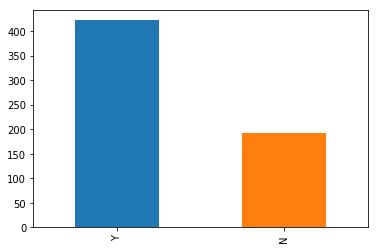

In [162]:
train['Loan_Status'].value_counts().plot.bar()

## categorical features

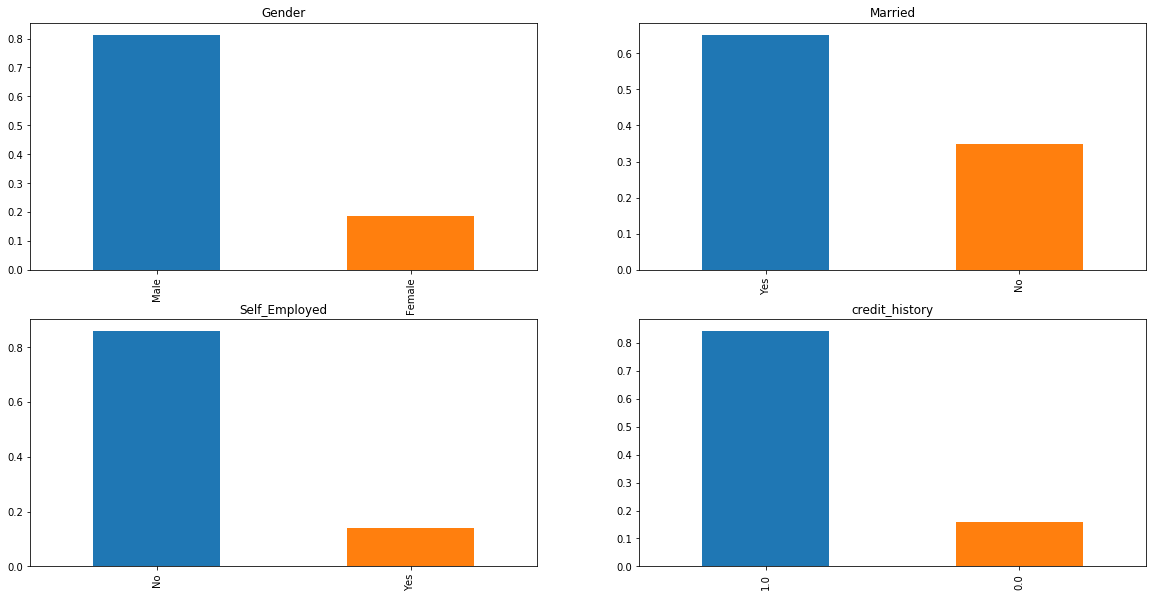

In [165]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")


plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')



plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self_Employed")



plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='credit_history')

plt.show()


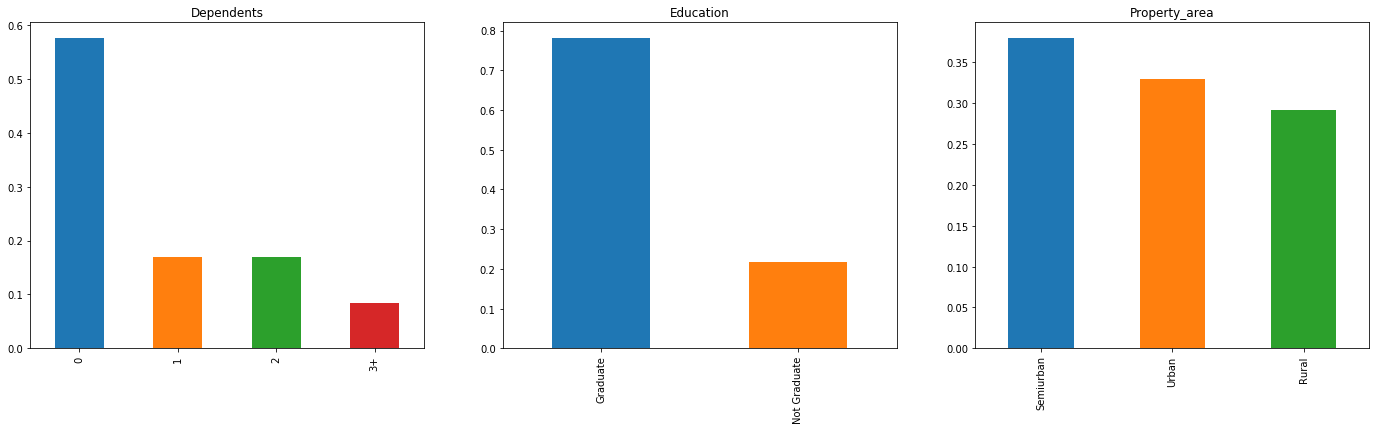

In [166]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Dependents")


plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')



plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title="Property_area")
plt.show()

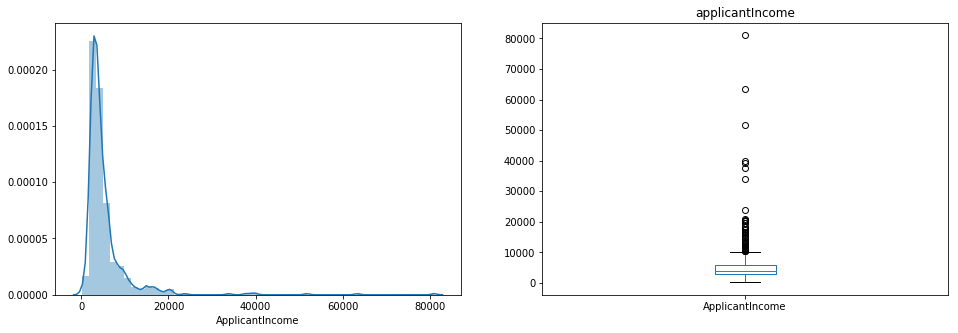

In [168]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5),title='applicantIncome')
plt.show()

## box plot confirms lots of outliers present

Text(0.5,0.98,'')

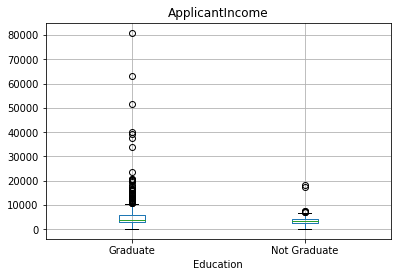

In [171]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

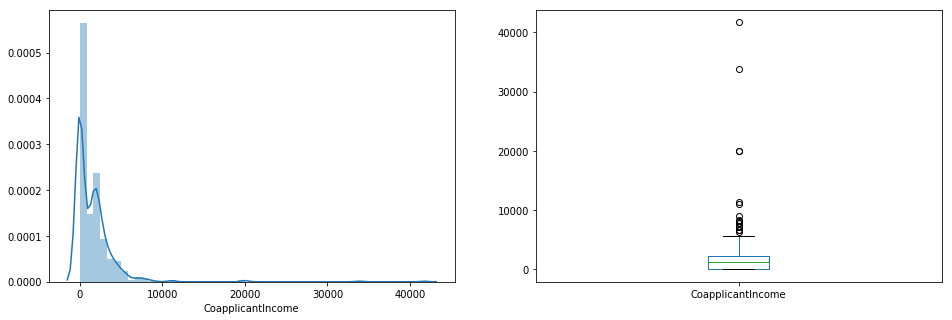

In [172]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()


## loan ampount plot

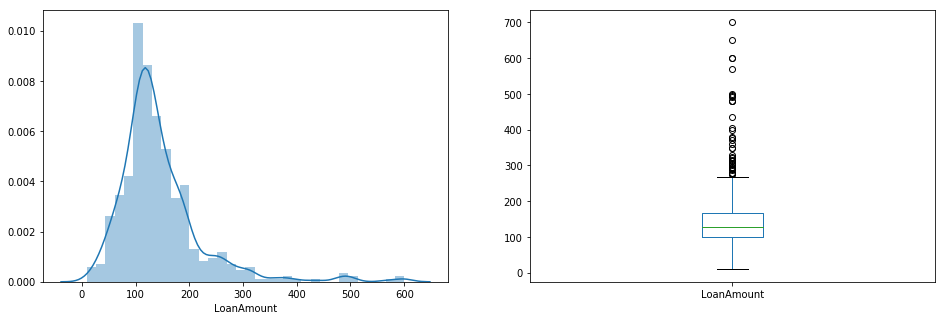

In [173]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# bi variate analysis

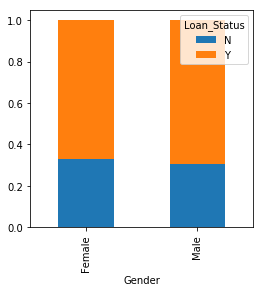

In [174]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

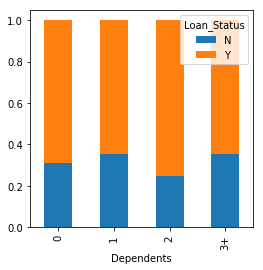

In [175]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

plt.show()

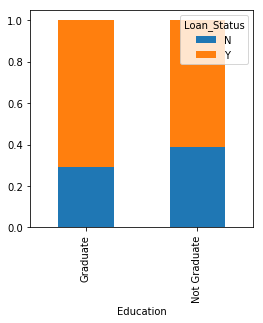

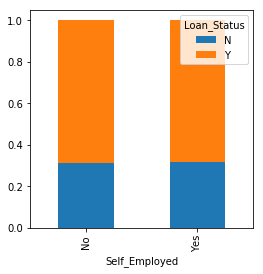

In [176]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])



Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

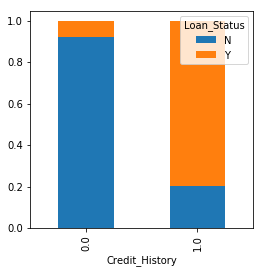

In [177]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

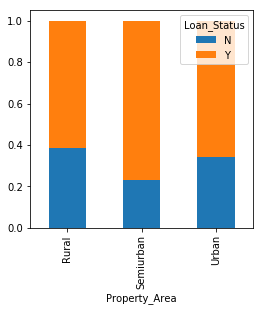

In [178]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

In [ ]:
## Numerical Independent Variable vs Target Variable

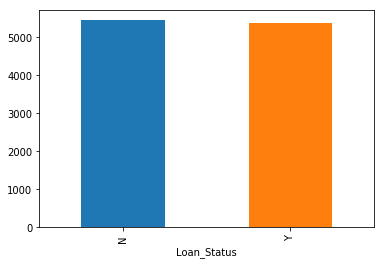

In [179]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

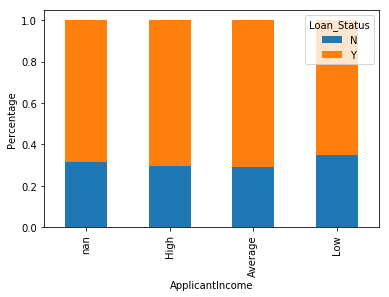

In [181]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [ ]:
## so applicant income does not effect the chances of loan approval
## which contradicts our hypothesis.

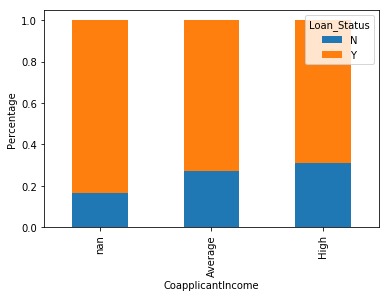

In [182]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

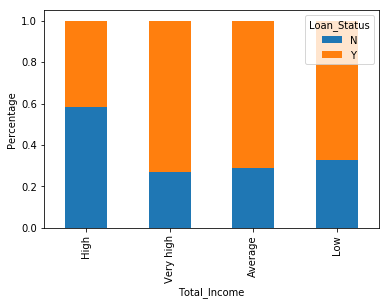

In [183]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')



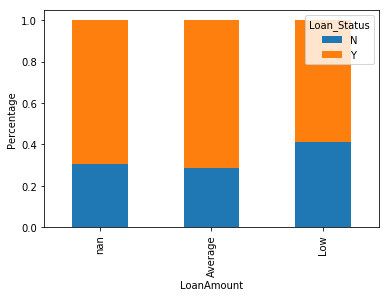

In [184]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [ ]:
## here labels are changed .i dont know what happen
## but our assumption si right i.e low loan amount gives high chance of loan approval.

In [ ]:
## lets drop bin to see the impact of features on loan status

In [185]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [186]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

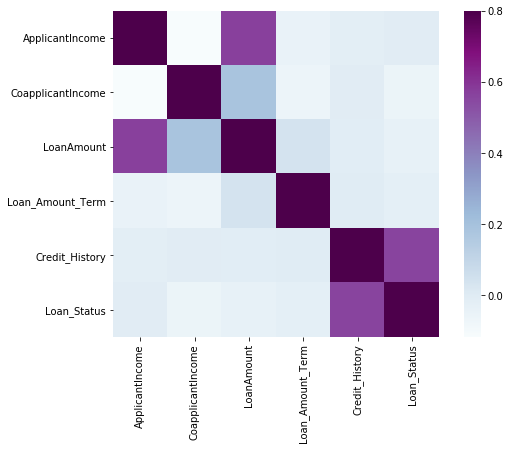

In [190]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

## figuring out missing values

In [191]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
## mean or median for numerical variables
## mode for categorical variables 

In [206]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [ ]:
## we used mode for loan_amount_term & median for Loanamount.
## bcz Loanamount has more outliers. 

In [208]:
## lets fill the missing values with same aproach in test set.

In [213]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [ ]:
## lets treat outliers now,with log transformation.

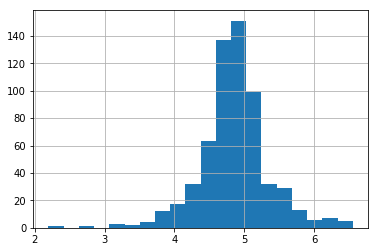

In [215]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [ ]:
## lets drop loan_id column from the train and test data sets.

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [259]:
X=train.drop('Loan_Status',1)
y=train['Loan_Status']

In [231]:
## we have to get some dummies here...bcz we are dealing with logistic regression.


In [260]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [233]:
## now lets split dataset into test train sets. so import it 

In [261]:
from sklearn.model_selection import train_test_split


x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [268]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [271]:
pred_cv= model.predict(x_cv)

In [272]:
accuracy_score(y_cv,predict_cv)

0.772972972972973

In [274]:
pred_test=model.predict(test)

In [293]:
submission=pd.read_csv('Sample_Submission_ZAuTl8O_FK3zQHh.csv')

In [315]:

submission['Loan_Status']=pred_test


In [316]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,"Y",inplace=True)

In [317]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logisti.csv')

In [318]:
from sklearn.model_selection import StratifiedKFold

In [324]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold is {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]



1 of kfold is 5
accuracy_score 0.7983870967741935

2 of kfold is 5
accuracy_score 0.8306451612903226

3 of kfold is 5
accuracy_score 0.8114754098360656

4 of kfold is 5
accuracy_score 0.7950819672131147

5 of kfold is 5
accuracy_score 0.8278688524590164


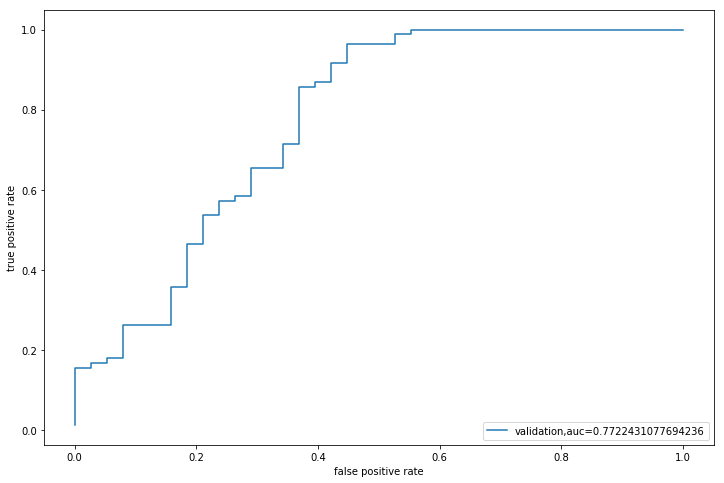

In [327]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl, pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation,auc='+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()
